In [33]:
#importy
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
#nacteni dat
data = pd.read_csv("dopravni_nehody.csv")
data.info()


C:\Users\Lukus\AppData\Local\Temp\ipykernel_17916\743097518.py:2: DtypeWarning: Columns (12,13,21,22,23,24,25,26,27,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("dopravni_nehody.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74107 entries, 0 to 74106
Data columns (total 69 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OBJECTID           74107 non-null  int64  
 1   zuj                74107 non-null  object 
 2   alkohol_vinik      74107 non-null  object 
 3   hlavni_pricina     74107 non-null  object 
 4   srazka             74107 non-null  object 
 5   nasledky           74107 non-null  object 
 6   pricina            74107 non-null  object 
 7   stav_vozovky       74107 non-null  object 
 8   povetrnostni_podm  74107 non-null  object 
 9   rozhled            74107 non-null  object 
 10  misto_nehody       74044 non-null  object 
 11  druh_komun         74107 non-null  object 
 12  pneumatiky         3108 non-null   object 
 13  druh_pohonu        3539 non-null   object 
 14  druh_vozidla       74107 non-null  object 
 15  mestska_cast       74107 non-null  object 
 16  pohlavi            547

In [35]:
#zjištění možných záznamů pro jeden sloupec (ukázka na stavu vozovky)
display(data['stav_vozovky'].unique())

array(['povrch suchý, neznečistěný', 'povrch mokrý',
       'na vozovce je bláto',
       'na vozovce je náledí, ujetý sníh - posypané',
       'souvislá sněhová vrstva, rozbředlý sníh',
       'náhlá změna stavu vozovky (námraza na mostu, místní náledí)',
       'povrch suchý, znečistěný (písek, prach, listí, štěrk atd.)',
       'jiný stav povrchu vozovky v době nehod',
       'na vozovce je náledí, ujetý sníh - neposypané',
       'na vozovce je rozlitý olej, nafta apod.'], dtype=object)

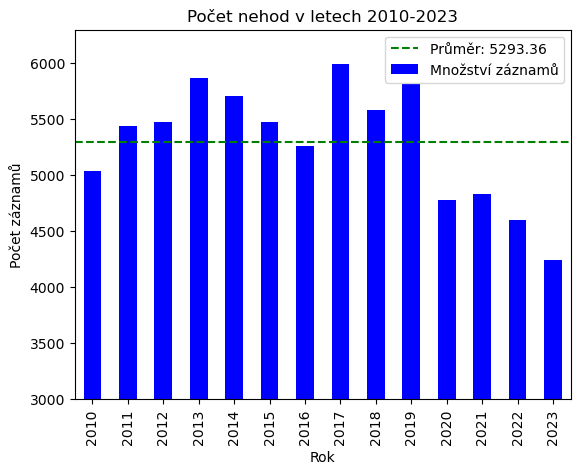

In [36]:
# rozdeleni zaznamu podle jednotlivych roku
rocni_nehody = data['rok'].value_counts().sort_index()

prumer_nehod = rocni_nehody.mean()
rocni_nehody.plot(kind='bar', label='Množství záznamů',color='b')

#plot grafu poctu nehod za jednotlive roky a jejich prumer
plt.axhline(y=prumer_nehod, color = 'g', linestyle='--', label=f'Průměr: {prumer_nehod:.2f}')

plt.title('Počet nehod v letech 2010-2023')
plt.xlabel('Rok')
plt.ylabel('Počet záznamů')
plt.ylim(3000,6300)

plt.legend()
plt.show()

In [37]:
#vypocet poklesu nehod v roce 2023 oproti prumeru
procentualni_pokles = ((prumer_nehod - rocni_nehody[2023]) / (prumer_nehod/100))
display(procentualni_pokles) #19.84292981769604

19.84292981769604

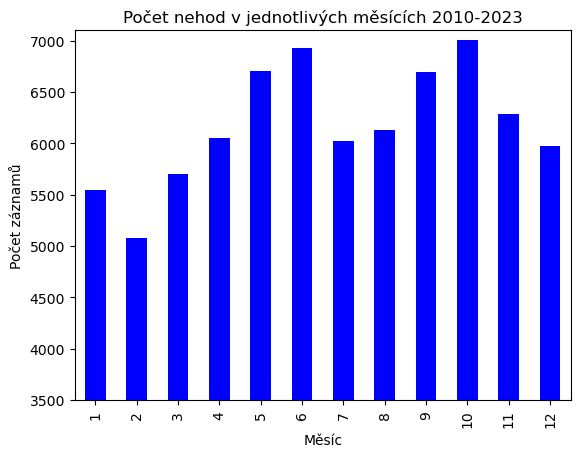

In [38]:
denvtydnu_nehoda = data['mesic'].value_counts().sort_index()

denvtydnu_nehoda.plot(kind='bar', label='Množství záznamů', color='b')

#plot grafu poctu nehod za jednotlive roky a jejich prumer

plt.title('Počet nehod v jednotlivých měsících 2010-2023')
plt.xlabel('Měsíc')
plt.ylabel('Počet záznamů')
plt.ylim(3500,7100)

plt.show()

In [39]:
# prevedeni datum formatu a kontrola zacatku a konce sady
data['datum'] = pd.to_datetime(data['datum'])
print(data['datum'].max())
print(data['datum'].min())
# vyskoci warning ale casovy format by mel byt preveden korektne

C:\Users\Lukus\AppData\Local\Temp\ipykernel_17916\2894370598.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['datum'] = pd.to_datetime(data['datum'])


2023-12-31 00:00:00
2010-01-01 00:00:00


In [40]:
# filtrace dat pro minuly rok
start_date = pd.to_datetime('2023-01-01')
end_date = pd.to_datetime('2024-01-01')

data23 = data[(data['datum'] >= start_date) & (data['datum'] <= end_date)]
print(data23['datum'].dtypes)

data23.info()

print(data['datum'].max())
print(data['datum'].min())

datetime64[ns]
<class 'pandas.core.frame.DataFrame'>
Index: 4243 entries, 0 to 4242
Data columns (total 69 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   OBJECTID           4243 non-null   int64         
 1   zuj                4243 non-null   object        
 2   alkohol_vinik      4243 non-null   object        
 3   hlavni_pricina     4243 non-null   object        
 4   srazka             4243 non-null   object        
 5   nasledky           4243 non-null   object        
 6   pricina            4243 non-null   object        
 7   stav_vozovky       4243 non-null   object        
 8   povetrnostni_podm  4243 non-null   object        
 9   rozhled            4243 non-null   object        
 10  misto_nehody       4180 non-null   object        
 11  druh_komun         4243 non-null   object        
 12  pneumatiky         3108 non-null   object        
 13  druh_pohonu        3539 non-null   object        
 14

In [41]:
# filtrovani sloupcu dat jenz budu pouzivat pro lepsi prehlednost
data_filt = data23.loc[:, ['zuj', 'alkohol_vinik', 'stav_vozovky', 'mestska_cast', 'pohlavi', 'den_v_tydnu', 'zavineni', 'doba', 'vek','hodina', 'mesic']]

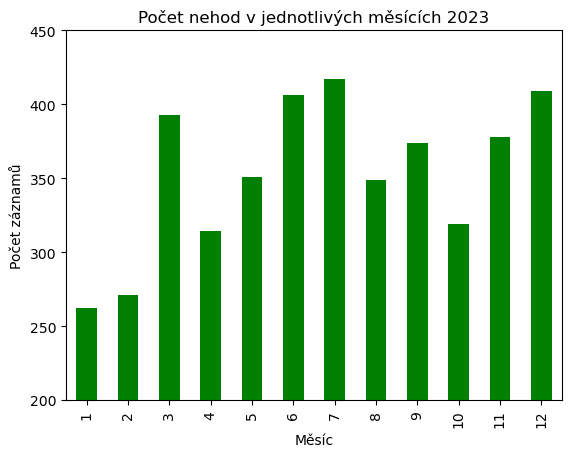

In [42]:
# rozdeleni zaznamu podle jednotlivych mesicu
mesice2023_nehoda = data_filt['mesic'].value_counts().sort_index()

# graf
mesice2023_nehoda.plot(kind='bar', label='Množství záznamů', color='green')

plt.title('Počet nehod v jednotlivých měsících 2023')
plt.xlabel('Měsíc')
plt.ylabel('Počet záznamů')
plt.ylim(200,450)

plt.show()

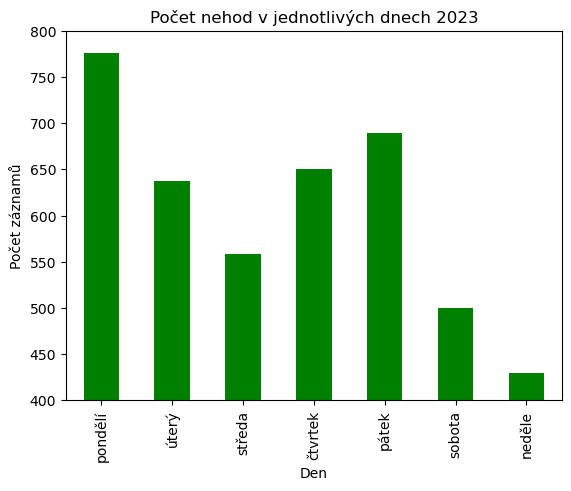

In [43]:
# rozdeleni zaznamu podle jednotlivych dni
denvtydnu_nehoda = data_filt['den_v_tydnu'].value_counts().sort_index()

# reindexace aby graf byl pondeli-nedele
dny_v_poradi = ["pondělí", "úterý", "středa", "čtvrtek", "pátek", "sobota", "neděle"]
denvtydnu_nehoda = denvtydnu_nehoda.reindex(dny_v_poradi)

# graf
denvtydnu_nehoda.plot(kind='bar', label='Množství záznamů', color='green')

plt.title('Počet nehod v jednotlivých dnech 2023')
plt.xlabel('Den')
plt.ylabel('Počet záznamů')
plt.ylim(400,800)

plt.show()

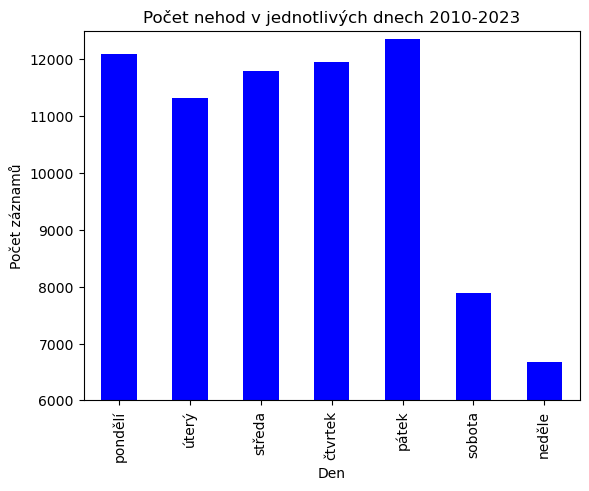

In [44]:
# rozdeleni zaznamu podle jednotlivych dni
denvtydnu_nehoda = data['den_v_tydnu'].value_counts().sort_index()

# reindexace aby graf byl pondeli-nedele
dny_v_poradi = ["pondělí", "úterý", "středa", "čtvrtek", "pátek", "sobota", "neděle"]
denvtydnu_nehoda = denvtydnu_nehoda.reindex(dny_v_poradi)

# graf
denvtydnu_nehoda.plot(kind='bar', label='Množství záznamů', color='b')

plt.title('Počet nehod v jednotlivých dnech 2010-2023')
plt.xlabel('Den')
plt.ylabel('Počet záznamů')
plt.ylim(6000,12500)

plt.show()

68434
pohlavi
muž     33296
žena    14205
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

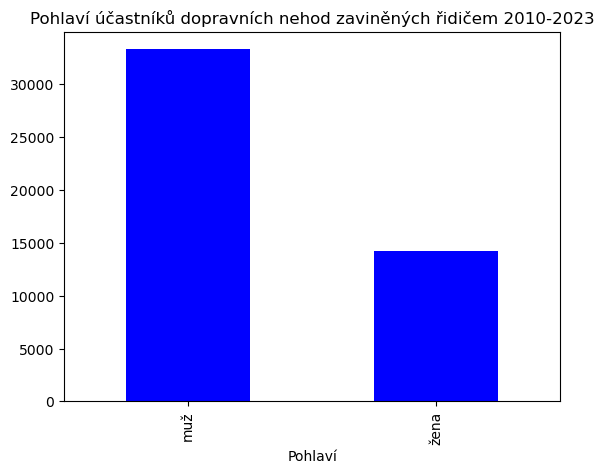

In [45]:
zavineni_auto = data[data['zavineni'] == 'řidičem motorového vozidla']
pohlavi_counts = zavineni_auto['pohlavi'].value_counts().sort_index()
pohlavi_counts = pohlavi_counts.loc[['muž', 'žena']]
print(zavineni_auto.shape[0])

# Print the counts
print(pohlavi_counts)

pohlavi_counts.plot(kind='bar', label='Množství záznamů', color='b')

plt.title(label='Pohlaví účastníků dopravních nehod zaviněných řidičem 2010-2023')
plt.xlabel('Pohlaví')
plt.show


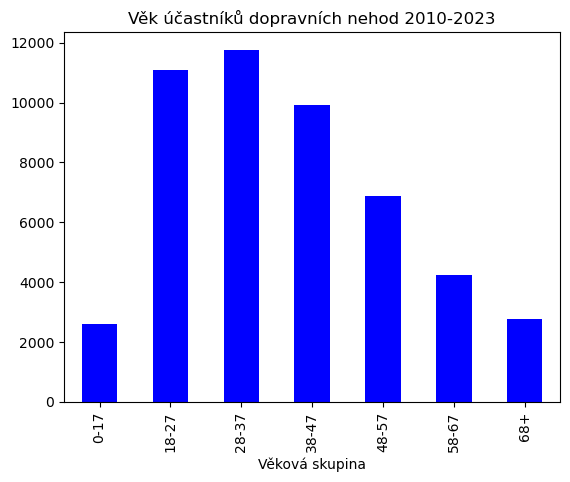

In [46]:
# analyza veku ucastniku nehod

# definice datových košů a jejich označení, filtrace dat na nehody zaviněné řidičem
bins = [0, 18, 28, 38, 48, 58, 68, data['vek'].max()]
labels = ['0-17', '18-27', '28-37', '38-47', '48-57', '58-67', '68+']
zavineni_auto_vek = data[data['zavineni'] == 'řidičem motorového vozidla'].copy()  # create a copy of the slice

# rozdělení dat do skupin
zavineni_auto_vek.loc[:, 'vekova_skupina'] = pd.cut(zavineni_auto_vek['vek'], bins=bins, labels=labels)
vekova_skupina_counts = zavineni_auto_vek['vekova_skupina'].value_counts().sort_index()

vekova_skupina_counts.plot(kind='bar', label='Množství záznamů', color='b')

plt.title(label='Věk účastníků dopravních nehod 2010-2023')
plt.xlabel('Věková skupina')
plt.show()




2023-12-27 00:00:00


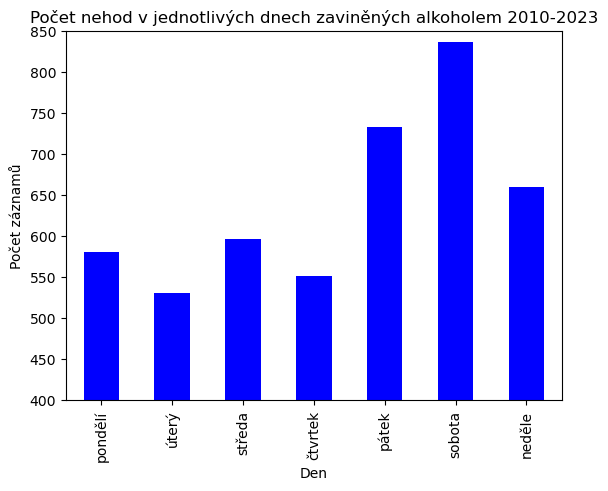

In [47]:
alkohol_data=data[data['alkohol_vinik'] == 'ano']
denvtydnu_nehoda = alkohol_data['den_v_tydnu'].value_counts().sort_index()
print(alkohol_data['datum'].max())

# reindexace aby graf byl pondeli-nedele
dny_v_poradi = ["pondělí", "úterý", "středa", "čtvrtek", "pátek", "sobota", "neděle"]
denvtydnu_nehoda = denvtydnu_nehoda.reindex(dny_v_poradi)

# graf
denvtydnu_nehoda.plot(kind='bar', label='Množství záznamů', color='b')

plt.title('Počet nehod v jednotlivých dnech zaviněných alkoholem 2010-2023')
plt.xlabel('Den')
plt.ylabel('Počet záznamů')
plt.ylim(400,850)

plt.show()

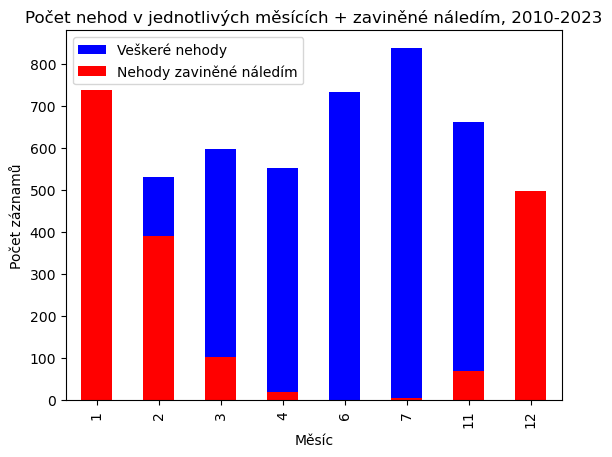

,OBJECTID,zuj,alkohol_vinik,hlavni_pricina,srazka,nasledky,pricina,stav_vozovky,povetrnostni_podm,rozhled,misto_nehody,druh_komun,pneumatiky,druh_pohonu,druh_vozidla,mestska_cast,pohlavi,alkohol,den_v_tydnu,mesic_t,katastr,chovani_chodce,stav_chodce,drogy_chodec,alkohol_chodec,osobni_prepravnik,reflexni_prvky,kategorie_chodce,nasledek,ozn_osoba,zavineni,viditelnost,situovani,osoba,stav_ridic,doba,smrt_po,lz,TARGET_FID,Join_Count,OBJECTID.1,Join_Count.1,TARGET_FID.1,den,vek,smrt_dny,rok_nar,p48a,p59d,rok,tz,smrt,lehce_zran_os,tezce_zran_os,usmrceno_os,id_vozidla,hodina,ovlivneni_ridice,cas,mesic,e,d,id_nehody,datum,hmotna_skoda,skoda_vozidlo,GlobalID,x,y
8748,8749,Brno-Bystrc,ne,nezaviněno řidičem,srážka s chodcem,nehoda s následky na životě nebo zdraví,nezaviněná řidičem,"náhlá změna stavu vozovky (námraza na mostu, m...","na počátku deště, slabý déšť, mrholení apod.",dobré,"zastávka tramvaje, autobusu, trolejbusu bez ná...",komunikace sledovaná (ve vybraných městech),NaN,NaN,osobní automobil bez přívěsu,Brno-Bystrc,muž,Ne,čtvrtek,červenec,Bystrc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bez zraněn,připoutaný bezpečnostními pásy (i na zadních s...,chodcem,"ve dne, viditelnost nezhoršená vlivem povětrno...",na jízdním pruhu,spolucestující na předním sedadle vedle řidiče...,dobrý -žádné nepříznivé okolnosti nebyly zjiště,den,NaN,0,9079,1,9079,1,9079,4,54.0,1.0,1956.0,1.0,56.0,2010,0,0,1,0,0,1.0,18.0,1.0,1840,7,-1157520.928,-604409.003,60206101303,2010-07-29,30000,30000,a6338eed-ca22-4081-8d37-0561857f1f6d,-604409.003,-1157520.928
8749,8750,Brno-Bystrc,ne,nezaviněno řidičem,srážka s chodcem,nehoda s následky na životě nebo zdraví,nezaviněná řidičem,"náhlá změna stavu vozovky (námraza na mostu, m...","na počátku deště, slabý déšť, mrholení apod.",dobré,"zastávka tramvaje, autobusu, trolejbusu bez ná...",komunikace sledovaná (ve vybraných městech),NaN,NaN,osobní automobil bez přívěsu,Brno-Bystrc,muž,Ne,čtvrtek,červenec,Bystrc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bez zraněn,připoutaný bezpečnostními pásy (i na zadních s...,chodcem,"ve dne, viditelnost nezhoršená vlivem povětrno...",na jízdním pruhu,řidič,dobrý -žádné nepříznivé okolnosti nebyly zjiště,den,NaN,0,9080,1,9080,1,9080,4,23.0,1.0,1987.0,1.0,87.0,2010,0,0,1,0,0,1.0,18.0,1.0,1840,7,-1157520.928,-604409.003,60206101303,2010-07-29,30000,30000,72a060d0-04f8-4442-9c9a-050b16c7f925,-604409.003,-1157520.928
28879,28880,Brno-Žebětín,nezjišťováno,nezaviněno řidičem,havárie,nehoda pouze s hmotnou škodou,nezaviněná řidičem,"náhlá změna stavu vozovky (námraza na mostu, m...",neztížené,dobré,žádné nebo žádné z uvedených,komunikace sledovaná (ve vybraných městech),NaN,NaN,"motocykl (včetně sidecarů, skútrů apod.)",Brno-Žebětín,muž,Nezjišťován,středa,červenec,Žebětín,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bez zraněn,"s přilbou (pouze u motocyklistů, příp. cyklistů)",závadou komunikace,"ve dne, viditelnost nezhoršená vlivem povětrno...",na jízdním pruhu,řidič,dobrý -žádné nepříznivé okolnosti nebyly zjiště,den,NaN,0,29333,1,29333,1,29333,3,44.0,1.0,1970.0,3.0,70.0,2014,0,0,0,0,0,1.0,12.0,1.0,1250,7,-1159922.308,-604033.650,60206141489,2014-07-30,86000,80000,e638b414-2ec9-4902-aaf4-75abb0411b1b,-604033.650,-1159922.308
67422,67423,Brno-střed,nezjišťováno,nezaviněno řidičem,jiný druh nehody,nehoda pouze s hmotnou škodou,nezaviněná řidičem,"náhlá změna stavu vozovky (námraza na mostu, m...",neztížené,dobré,žádné nebo žádné z uvedených,komunikace sledovaná (ve vybraných městech),NaN,NaN,osobní automobil bez přívěsu,Brno-střed,muž,Nezjišťován,čtvrtek,červen,Město Brno,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bez zraněn,připoutaný bezpečnostními pásy (i na zadních s...,závadou komunikace,"v noci - s veřejným osvětlením, viditelnost ne...",na jízdním pruhu,řidič,dobrý -žádné nepříznivé okolnosti nebyly zjiště,noc,NaN,0,68446,1,68446,1,68446,4,40.0,1.0,1982.0,3.0,82.0,2022,0,0,0,0,0,1.0,2.0,1.0,215,6,-1160682.951,-598302.414,60206221006,2022-06-09,520000,20000,c1045743-bc9e-4681-b64c-f44b31c82d28,-598302.414,-1160682.951
71358,71359,Brno-Byst

5

In [48]:
mesice_nehoda = data['mesic'].value_counts().sort_index()
naledi_data = data[data['stav_vozovky'].isin(['na vozovce je náledí, ujetý sníh - posypané', 'souvislá sněhová vrstva, rozbředlý sníh', 'náhlá změna stavu vozovky (námraza na mostu, místní náledí)', 'na vozovce je náledí, ujetý sníh - neposypané'])]
denvtydnu_nehoda_naledi = naledi_data['mesic'].value_counts().sort_index()

denvtydnu_nehoda.plot(kind='bar', label='Veškeré nehody', color='b')
denvtydnu_nehoda_naledi.plot(kind='bar', label='Nehody zaviněné náledím', color='r')

plt.title('Počet nehod v jednotlivých měsících + zaviněné náledím, 2010-2023')
plt.xlabel('Měsíc')
plt.ylabel('Počet záznamů')
plt.legend()

plt.show()

# získání záznamů nehod způsobené náledím v dubnu a květnu
records = naledi_data.loc[(naledi_data['mesic'] == 6) | (naledi_data['mesic'] == 7)]
display(records)
display(records.shape[0])

In [49]:
print(data['hmotna_skoda'].max())
print(data['usmrceno_os'].max())

5360000
3
